In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data 2017
path = "/Users/irenevolpe/Documents/"
oecd_bli = pd.read_csv(path + "oecd_2017.csv", thousands=',')

gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [4]:
oecd_bli.columns.values[2] = 'INDIC'
oecd_bli.head(5)

,LOCATION,Country,INDIC,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


In [5]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [6]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [7]:
oecd_bli = oecd_bli.pivot_table(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.000000,12.993333,71.8,64.233333,1.000000,36131.4,57462.0,20.0,...,49909.6,94.25,2.3,86.8,2.7,503.6,14.350000,91.4,92.333333,21.200000
Austria,16.0,1.0,84.666667,6.706667,71.0,80.833333,0.433333,34168.8,59574.0,21.0,...,46422.4,92.50,1.6,70.0,1.3,492.8,14.530000,74.8,93.000000,17.133333
Belgium,15.0,2.3,75.000000,4.266667,63.4,70.833333,1.033333,31263.8,104084.0,21.0,...,48532.6,92.25,2.2,74.4,2.2,503.8,15.730000,90.0,84.000000,18.166667
Brazil,10.0,6.7,49.000000,7.026667,65.8,37.466667,27.933333,14220.8,7102.0,20.0,...,13275.8,89.00,0.8,70.2,2.2,398.2,14.423333,79.6,72.000000,15.900000
Canada,7.0,0.2,90.666667,3.723333,71.0,81.166667,1.366667,31680.4,85758.0,22.0,...,47660.4,93.00,2.5,87.4,3.0,523.2,14.393333,68.4,91.000000,16.333333


In [15]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", ascending=False, inplace=True)
full_country_stats.head(10)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Luxembourg,12.0,0.0,79.000000,3.586667,68.6,72.066667,0.633333,43746.0,74141.0,20.0,...,15.123333,92.2,84.666667,15.066667,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",101994.093,2014.0
Switzerland,15.0,0.0,87.333333,6.776667,79.0,84.100000,0.500000,38799.2,128415.0,21.0,...,14.990000,48.8,95.666667,17.500000,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",80675.308,2015.0
Norway,5.0,0.0,82.333333,3.140000,74.8,87.633333,0.600000,37135.8,20347.0,17.0,...,15.563333,78.2,96.333333,18.100000,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0
United States,10.0,0.1,90.000000,11.336667,69.4,74.100000,4.900000,48514.8,176076.0,18.0,...,14.436667,66.8,84.333333,17.133333,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",55805.204,2015.0
Denmark,9.0,0.6,80.666667,2.166667,74.8,83.066667,0.700000,30342.4,73543.0,24.0,...,15.873333,86.0,94.333333,19.733333,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
Ireland,7.0,0.1,80.000000,4.680000,66.0,75.666667,0.600000,27053.6,43493.0,21.0,...,15.253333,65.0,82.000000,18.700000,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",51350.744,2014.0
Australia,5.0,1.1,80.000000,12.993333,71.8,64.233333,1.000000,36131.4,57462.0,20.0,...,14.350000,91.4,92.333333,21.200000,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Iceland,3.0,0.0,78.000000,14.600000,86.2,87.466667,0.900000,31637.8,64398.0,24.0,...,14.126667,79.8,98.666667,19.333333,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50854.583,2014.0
Sweden,6.0,0.0,83.000000,1.110000,77.0,75.966667,1.000000,32061.6,90708.0,20.0,...,15.176667,86.4,95.000000,19.200000,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",49866.266,2014.0


In [16]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
country_stats

,GDP per capita,Life satisfaction
Country,,
Norway,74822.106,7.560
United States,55805.204,7.050
Denmark,52114.165,7.600
Ireland,51350.744,6.960
Iceland,50854.583,7.560
United Kingdom,43770.688,6.720
Austria,43724.031,7.080
Netherlands,43603.115,7.450
Canada,43331.961,7.280


In [17]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

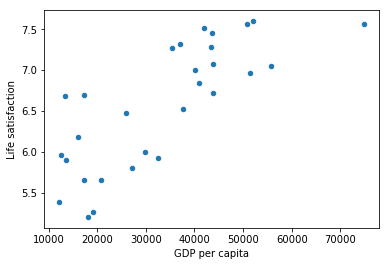

In [19]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [22]:
model = sklearn.linear_model.LinearRegression() #select a model (linear regression)
model.fit(X, y) #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # Make a prediction for Cyprus' life satisfaction

[[ 6.16560824]]
